# Task2: Titanic Classification

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading our dataset

In [2]:
# Reading training data
df1=pd.read_csv('train.csv')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df1.shape

(891, 12)

In [4]:
# Reading testing data
df2=pd.read_csv('test.csv')
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df2.shape

(418, 11)

In [6]:
# Merging both training and testing dataset

df=pd.concat([df1,df2],axis=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.shape

(1309, 12)

## Exploratory Data Analysis

### Visualization

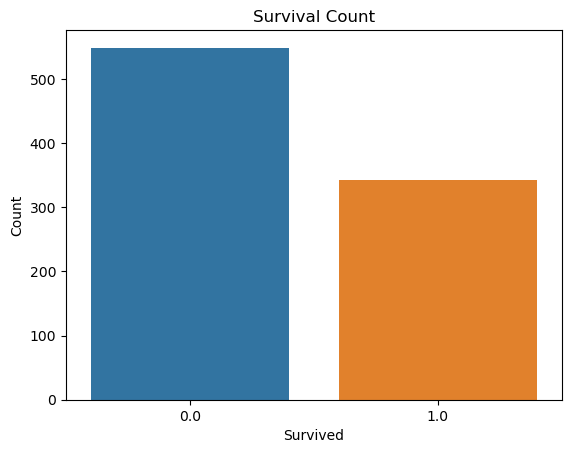

In [8]:
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

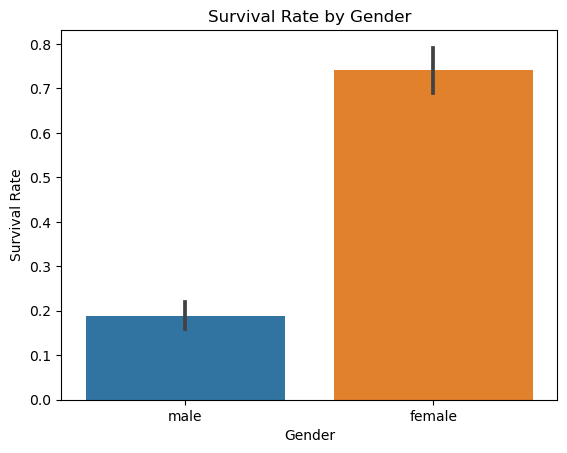

In [9]:
sns.barplot(data=df, x='Sex', y='Survived')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

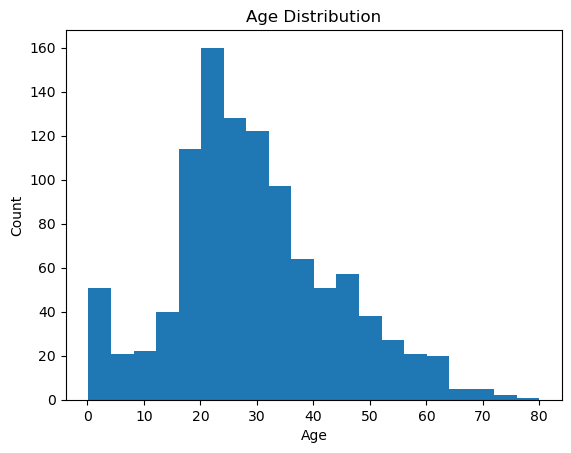

In [10]:
plt.hist(df['Age'].dropna(), bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

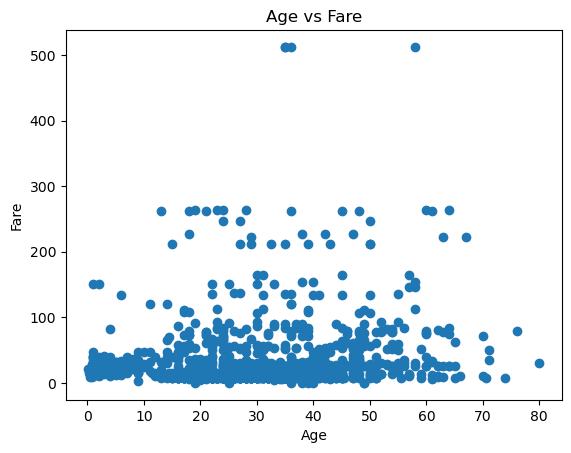

In [11]:
plt.scatter(df['Age'], df['Fare'])
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

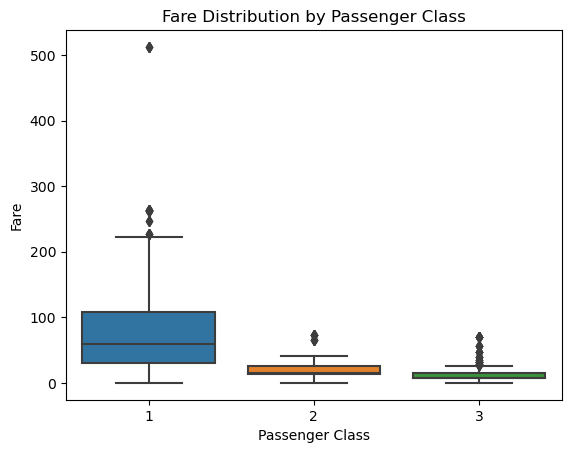

In [12]:
sns.boxplot(data=df, x='Pclass', y='Fare')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

### Feature Engineering

In [13]:
# Checking null values
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [14]:
# Dropping unnecessary columns

df.drop(['PassengerId','Name','Cabin','Ticket'],axis=1,inplace=True)

In [15]:
# Handling null values

df['Age']=df['Age'].fillna(df['Age'].mode()[0])
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

In [16]:
df['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [17]:
# Encoding our categorical data

df['Sex']=df['Sex'].map({'male':0,'female':1})
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})

In [18]:
# Seprating train and test
df_train=df.iloc[:891,:]
df_test=df.iloc[891:,:]
df_test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,NaN,3,0,34.5,0,0,7.8292,2
1,NaN,3,1,47.0,1,0,7.0000,0
2,NaN,2,0,62.0,0,0,9.6875,2
3,NaN,3,0,27.0,0,0,8.6625,0
4,NaN,3,1,22.0,1,1,12.2875,0


In [19]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,0,22.0,1,0,7.2500,0
1,1.0,1,1,38.0,1,0,71.2833,1
2,1.0,3,1,26.0,0,0,7.9250,0
3,1.0,1,1,35.0,1,0,53.1000,0
4,0.0,3,0,35.0,0,0,8.0500,0


In [20]:
df_train.shape

(891, 8)

In [21]:
df_test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,NaN,3,0,34.5,0,0,7.8292,2
1,NaN,3,1,47.0,1,0,7.0000,0
2,NaN,2,0,62.0,0,0,9.6875,2
3,NaN,3,0,27.0,0,0,8.6625,0
4,NaN,3,1,22.0,1,1,12.2875,0


In [22]:
df_test.shape

(418, 8)

In [23]:
# Dropping Survived column from testing data

df_test.drop(['Survived'],axis=1,inplace=True)

C:\Temp\ipykernel_4852\2003504822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['Survived'],axis=1,inplace=True)


In [24]:
y=df_train.iloc[:,0]
X=df_train.iloc[:,[1,2,3,4,5,6,7]]
X.shape

(891, 7)

In [25]:
# Scaling using StandardScaler to scale our data b/w -1 to 1

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_train=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
df_test=pd.DataFrame(scaler.transform(df_test),columns=df_test.columns)

In [26]:
# Using XGBoost to train the data

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
#model=XGBClassifier(n_estimators= 50, min_child_weight= 3, max_depth= 8, gamma= 1, eta= 0.3)
model=XGBClassifier()
score=cross_val_score(model,X,y,scoring='accuracy',cv=10)
print(score.mean())

0.8204619225967541


In [27]:
# Hyperparameter tuning to improve the model accuracy
from sklearn.model_selection import GridSearchCV
param={'eta':[0.1,0.2,0.3,0.5,0.7],
          'max_depth':[2,3,5,8,10],
          'n_estimators': [50,200,250]}
xg_boost=GridSearchCV(model,param,scoring='accuracy',cv=3,verbose = 1)
xg_boost.fit(X,y)
print(xg_boost.best_params_)
print(xg_boost.best_score_)

Fitting 3 folds for each of 75 candidates, totalling 225 fits
{'eta': 0.2, 'max_depth': 5, 'n_estimators': 50}
0.8383838383838383


In [28]:
pred=xg_boost.predict(df_test)
pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [29]:
import pickle
filename='finalized_model.pkl'
pickle.dump(xg_boost, open(filename, 'wb'))

In [30]:
# Checking accuracy by comparing actual values with predicted values
sub_df=pd.read_csv('gender_submission.csv')
actual_values= sub_df['Survived']

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print("Confusion Matrix: \n",confusion_matrix(actual_values,pred))
print('\n')
print("Accuracy Score: \n",accuracy_score(actual_values,pred))
print('\n')
print("Classification Report: \n",classification_report(actual_values,pred))

Confusion Matrix: 
 [[266   0]
 [  0 152]]


Accuracy Score: 
 1.0


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



## Such a fabulous result we are having so that's it
## THANK YOU